In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt

# Read in the edgelist file from csv
file_network = pd.read_csv("london_flows.csv")

# Print data (first five rows)
file_network.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


Part 1: London’s underground resilience
I. Topological Network

In [2]:
import networkx as nx
# Create graph object
g_station = nx.from_pandas_edgelist(file_network, 'station_origin', 'station_destination')

1. Centrality Measures
(1) Degree centrality

In [3]:
#Compute the centrality
centrality=nx.degree_centrality(g_station)
# Print the top 10 nodes
sorted_nodes_degree = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_degree, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

                  nodes  centrality
0             Stratford    0.922111
1  Highbury & Islington    0.806533
2           Whitechapel    0.781407
3         West Brompton    0.776382
4          Canary Wharf    0.771357
5          Canada Water    0.771357
6      Liverpool Street    0.768844
7     Bank and Monument    0.766332
8              Richmond    0.766332
9          Canning Town    0.763819


(2) Closeness centrality

In [32]:
#Compute the centrality
centrality=nx.closeness_centrality(g_station)
# Print the top 10 nodes
sorted_nodes_closeness= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_closeness, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

                  nodes  centrality
0             Stratford    0.927739
1  Highbury & Islington    0.836134
2           Whitechapel    0.820619
3         West Brompton    0.817248
4          Canada Water    0.813906
5     Bank and Monument    0.810591
6          Canary Wharf    0.810591
7              Richmond    0.810591
8          Canning Town    0.808943
9      Liverpool Street    0.808943


(3) Betweenness centrality

In [33]:
#Compute the centrality
centrality=nx.betweenness_centrality(g_station)
# Print the top 10 nodes
sorted_nodes_betweenness = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_nodes_betweenness, columns=['nodes', 'centrality'])
top_10 = df.head(10)
print(top_10)

                  nodes  centrality
0             Stratford    0.098553
1      Liverpool Street    0.034307
2     Bank and Monument    0.027956
3          Canary Wharf    0.027956
4          Canning Town    0.027757
5              West Ham    0.024551
6  Highbury & Islington    0.023023
7           Whitechapel    0.019682
8          Canada Water    0.017898
9              Shadwell    0.017070


2. Impact Measures
(1) Average shortest path length

In [20]:
impact= nx.average_shortest_path_length(g_station)
print(impact)

1.6122970743441518


(2) Density

In [21]:
impact= nx.density(g_station)
print(impact)

0.3994660016876362


3. Node Removal

(1) Degree centrality
i. Average shortest path length

[1.6399757  1.64231738 1.64445723 1.64658485 1.64867413 1.66243444
 1.73722532 1.74015345 1.74279876 1.75757295]


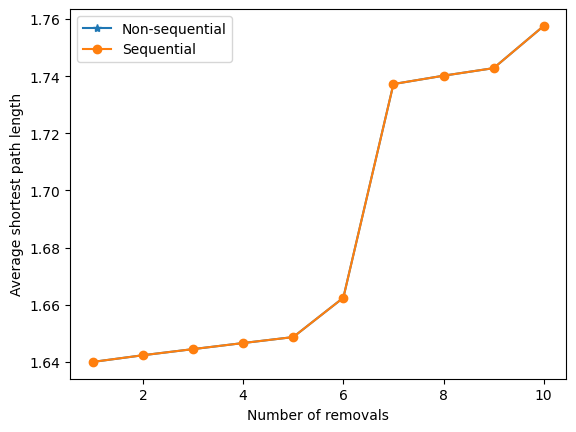

In [28]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.degree_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    if nx.is_connected(g_station_non_seq):
        impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq)   
    else:
        impact_non_seq[i]=np.inf
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.degree_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq)       
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')



ii. Density

[0.39683303 0.3947663  0.39281422 0.3908758  0.38896423 0.38702809
 0.38510622 0.38317267 0.38122734 0.37928339]


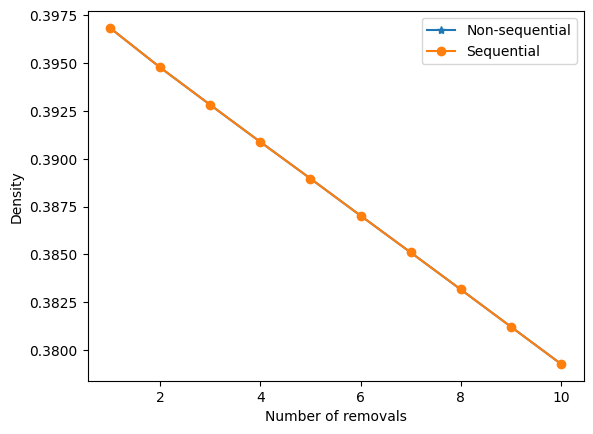

In [10]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.degree_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    
    g_station_non_seq.remove_node(sorted_nodes[i][0]) 
    impact_non_seq[i]= nx.density(g_station_non_seq)  
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    
    centrality=nx.degree_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0]) 
    impact_seq[i]= nx.density(g_station_seq)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')
print(impact_non_seq)##############################################################

(2) Closeness centrality
i.  Average shortest path length

[1.6399757  1.64231738 1.64445723 1.64658485 1.66027305 1.66243444
 1.66511822 1.66749295 1.68198537 1.75757295]


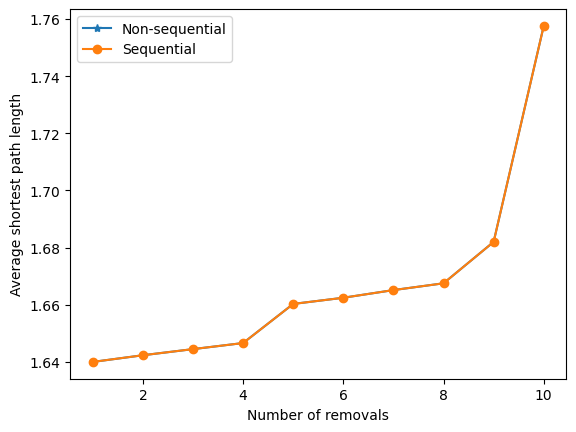

In [7]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.closeness_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    if nx.is_connected(g_station_non_seq):
        impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq)   
    else:
        impact_non_seq[i]=np.inf  
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.closeness_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq)       
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')
print(impact_non_seq)##############################################################

ii. Density

[0.39683303 0.3947663  0.39281422 0.3908758  0.38895132 0.38704108
 0.38510622 0.38317267 0.38124052 0.37928339]


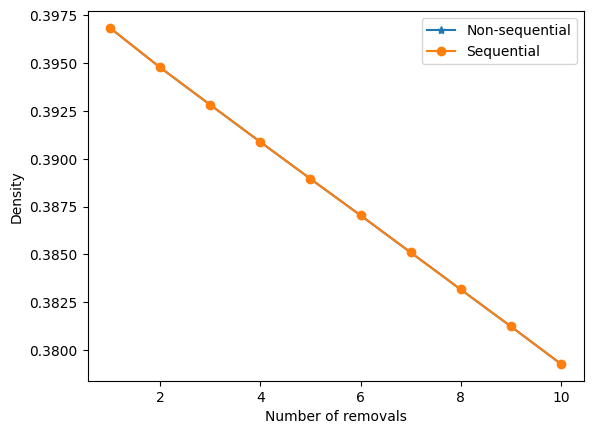

In [9]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.closeness_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    impact_non_seq[i]= nx.density(g_station_non_seq)
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    
    centrality=nx.closeness_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    impact_seq[i]= nx.density(g_station_seq)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')
print(impact_non_seq)##############################################################

(3) Betweenness centrality
i.  Average shortest path length

0
yesStratford
1
yesLiverpool Street
2
yesBank and Monument
3
yesCanary Wharf
4
yesCanning Town
5
yesWest Ham
6
yesHighbury & Islington
7
yesWhitechapel
8
yesCanada Water
9
noShadwell
0
yesStratford
1
yesBank and Monument
2
noBank and Monument
3
noWest Ham
4
noHighbury & Islington
5
noRichmond
6
noBarking
7
noWillesden Junction
8
noShepherd's Bush
9
noKew Gardens


Text(0, 0.5, 'Average shortest path length')

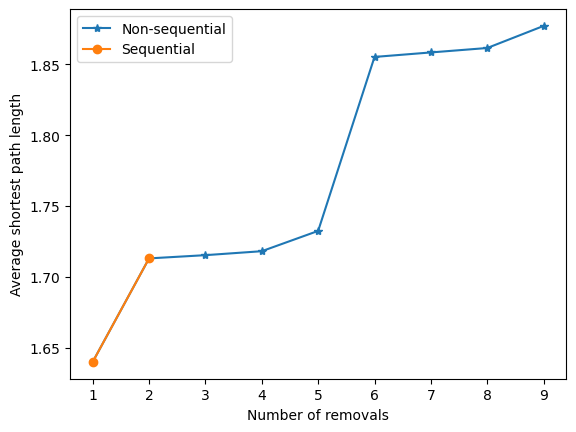

In [26]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.betweenness_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0]) 
    if nx.is_connected(g_station_non_seq):
        impact_non_seq[i]= nx.average_shortest_path_length(g_station_non_seq)   
    else:
        impact_non_seq[i]=np.inf
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.betweenness_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])
    if nx.is_connected(g_station_seq):
        impact_seq[i]= nx.average_shortest_path_length(g_station_seq)   
    else:
        impact_seq[i]=np.inf
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Average shortest path length')

ii. Density

Text(0, 0.5, 'Density')

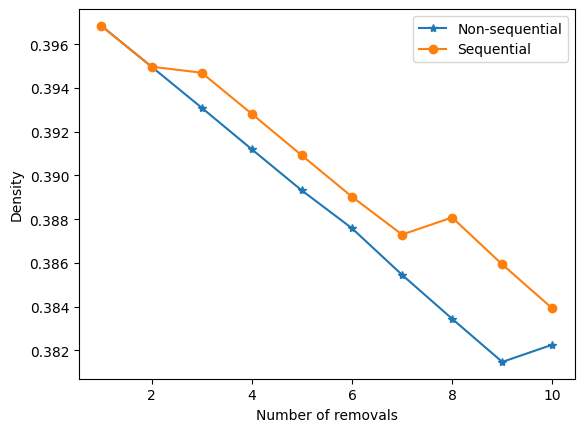

In [27]:
# non-sequential removal
num=10
g_station_non_seq=copy.deepcopy(g_station)
centrality=nx.betweenness_centrality(g_station_non_seq)
sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
impact_non_seq=np.zeros(num)
for i in range(num):
    g_station_non_seq.remove_node(sorted_nodes[i][0])
    impact_non_seq[i]= nx.density(g_station_non_seq)
# sequential removal
g_station_seq=copy.deepcopy(g_station)
impact_seq=np.zeros(num)
for i in range(num):
    centrality=nx.betweenness_centrality(g_station_seq)
    sorted_nodes= sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    g_station_seq.remove_node(sorted_nodes[0][0])  
    impact_seq[i]= nx.density(g_station_seq)
x=np.array(range(1,num+1))
plt.figure()
plt.plot(x,impact_non_seq,'-*',x,impact_seq,'-o')
plt.legend(['Non-sequential','Sequential'])
plt.xlabel('Number of removals')
plt.ylabel('Density')